# Analysis 
Analysis of the data has yielded the following conclusions:

Both Capomulin and Ramicane show mice with significantly smaller tumor sizes as compared to other drugs; the high whiskers of their box plots are compareable to the low whiskers of the other 2 drugs analyzed.

The tumor volume for mouse L509 (Capomulin) went down significantly after timepoint 20, however, began to increase ~ timepoint 35. More individual mice taking Capomulin will have to be analyzed to see if this is a common occourance. If this is the case, it might imply resistance to treatment over time. 

Tumor volume of mice on Capomulin has a strong direct correlation with weight with a correlation coefficient of 0.84. This implies Capomulin treatments less effective on heavier subjects. Potentially increasing dosage for larger subjects. 

Capomulin shows promising results; however, further testing will be needed to before considering bringing the drug to clinical trials

In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress, pearsonr, spearmanr

# Read the mouse data and the study results
mouse_metadata = pd.read_csv("Resources/Mouse_metadata.csv")
study_results = pd.read_csv("Resources/Study_results.csv")



In [2]:
mouse_data=pd.merge(mouse_metadata,study_results,how = "inner", on = "Mouse ID")

In [3]:
len(mouse_data["Mouse ID"].unique())

249

In [4]:
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
mouse_data_duplicates = mouse_data[mouse_data.duplicated(subset=["Mouse ID", "Timepoint"], keep = False)]["Mouse ID"].unique() # Requires a subset to pull unique timepoints
# finding duplicated data

mouse_data = mouse_data[~mouse_data["Mouse ID"].isin(mouse_data_duplicates)]

#Find "Not" duplicated data in dataset "mousedata" by removing the data in Mouse ID that appear in duplicated data

In [6]:
mouse_data_duplicates


array(['g989'], dtype=object)

In [7]:
len(mouse_data["Mouse ID"].unique())

248

In [8]:
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
mouse_data_drug = mouse_data.copy()
mouse_data_drug = mouse_data_drug.groupby(["Drug Regimen"])
eval_list = []

tumor_mean = mouse_data_drug['Tumor Volume (mm3)'].mean() #evaluating and adding to a list
eval_list.append(tumor_mean)

tumor_med = mouse_data_drug['Tumor Volume (mm3)'].median()
eval_list.append(tumor_med)

tumor_var = mouse_data_drug['Tumor Volume (mm3)'].var()
eval_list.append(tumor_var)

tumor_std = mouse_data_drug['Tumor Volume (mm3)'].std()
eval_list.append(tumor_std)

tumor_sem = mouse_data_drug['Tumor Volume (mm3)'].sem()
eval_list.append(tumor_sem)

mouse_data_eval = pd.concat(eval_list, axis = 1)
mouse_data_eval.columns = ["Mean Vol","Median Vol","Vol Variance","Vol Stdev", "Vol SEM"]
mouse_data_eval

,Mean Vol,Median Vol,Vol Variance,Vol Stdev,Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie charts

<AxesSubplot:xlabel='Drug Regimen'>

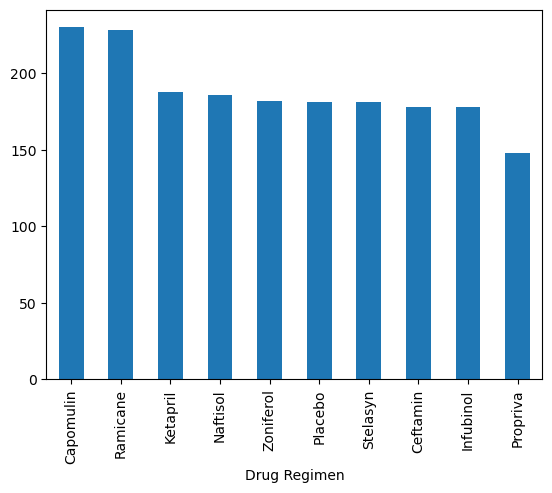

In [40]:
#Using .plot()
mouse_data_drug["Mouse ID"].count().sort_values(ascending=False).plot(kind = "bar") #Index is already set to drug

In [19]:
mouse_data_drug

<function matplotlib.pyplot.show(close=None, block=None)>

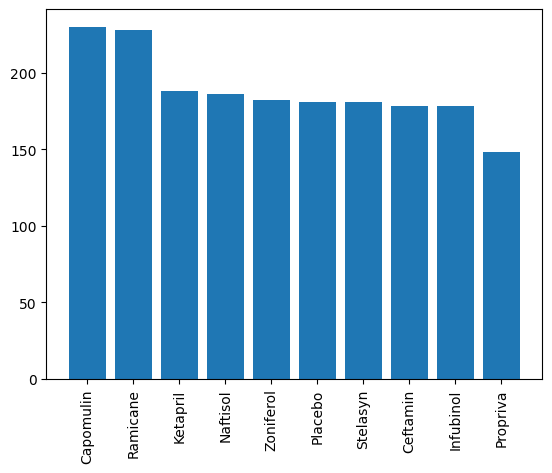

In [36]:
#Using pyplot

mice_per_drug = mouse_data_drug["Mouse ID"].count()
mice_per_drug = mice_per_drug.sort_values(ascending=False)

plt.bar(x= mice_per_drug.index,height=mice_per_drug.values)
plt.xticks(rotation=90)

plt.show

<AxesSubplot:ylabel='Mouse ID'>

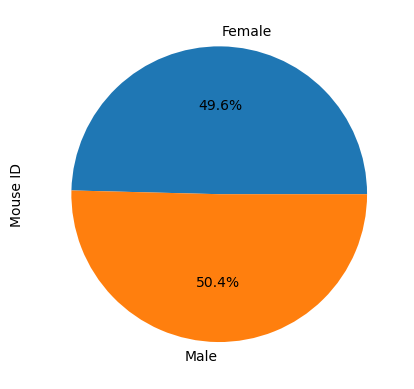

In [42]:
#Using .plot()
mouse_data.groupby(["Sex"])["Mouse ID"].nunique().plot(kind = "pie", autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x224e26a5940>,
 [Text(0.013934097579311265, 1.0999117423341975, 'Female'),
  Text(-0.0139340975793114, -1.0999117423341975, 'Male')],
 [Text(0.007600416861442507, 0.5999518594550168, '49.6%'),
  Text(-0.007600416861442581, -0.5999518594550168, '50.4%')])

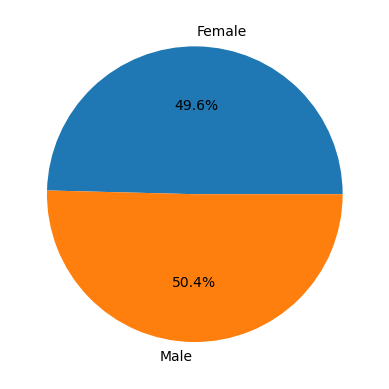

In [55]:
#Using pyplot
pie = mouse_data.groupby(["Sex"])["Mouse ID"].nunique()
pie_labels = pie.index
plt.pie(pie, labels = pie_labels, autopct="%1.1f%%")

In [38]:
max_time = mouse_data["Timepoint"].max()
final_points = mouse_data[mouse_data["Timepoint"] == max_time]
final_points

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [52]:
final_by_id = pd.merge(final_points,mouse_data,).set_index(["Mouse ID"]) # Unsure if this merge was nessessary-- but it's required in instructions
final_by_id

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,45,22.050126,1
s185,Capomulin,Female,3,17,45,23.343598,1
x401,Capomulin,Female,16,15,45,28.484033,0
m601,Capomulin,Male,22,17,45,28.430964,1
g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...
y769,Ceftamin,Female,6,27,45,68.594745,4
y865,Ceftamin,Male,23,26,45,64.729837,3
z581,Infubinol,Female,24,25,45,62.754451,3


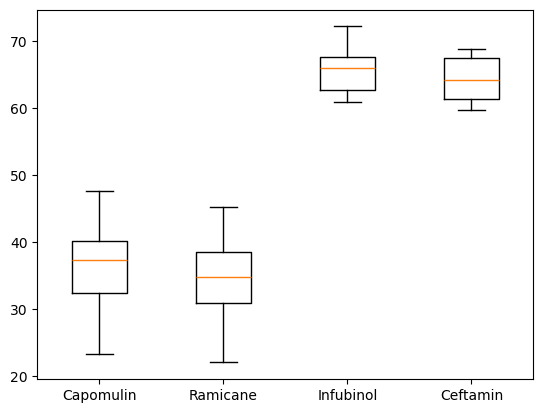

In [75]:
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugtionary = {x : None for x in drug_list}

"""
General idea of plan. For x in drug list loop Goes through the data for when "drug regimen" == x 
it will take the resulting data and spit out a dictionary with the values categorized by drug in a list
Then I will make a box plot using the values of each drug in the dictionary
"""
# I am very proud of this
for x in drug_list:
    r = final_points[final_points["Drug Regimen"] == x]
    drugtionary[x] = (list(r["Tumor Volume (mm3)"])) # needs to be a list to not pass the index

plt.boxplot(drugtionary.values(), labels = drugtionary.keys())
plt.show()

In [83]:
# Printing out the quartiles for easier viewing
# this is a for loop that scrolls through the dictionary and gives me Quartile stuff. 

for x in drugtionary.keys():
    y = drugtionary[x]
    q1 = np.quantile(y,.25)
    q3 = np.quantile(y,.75)
    
    print(f"Quartile metrics for {x}:")
    print(f" 1st Quartile is {q1}")
    print(f" 2nd Quartile is {np.quantile(y,.5)}")
    print(f" 3rd Quartile is {q3}")
    iqr = np.quantile(y,.75)-np.quantile(y,.25)
    print(f" IQR is {iqr}")
    
    outliers = []
    for z in y:
        if z > q3 + 1.5*iqr or z< q1 - 1.5*iqr:
            outliers.append(z)
        
    print(f" Potential outliers: {outliers}")

    print("---"*12)
    

Quartile metrics for Capomulin:
 1st Quartile is 32.37735684
 2nd Quartile is 37.31184577
 3rd Quartile is 40.1592203
 IQR is 7.781863460000004
 Potential outliers: []
------------------------------------
Quartile metrics for Ramicane:
 1st Quartile is 30.981175225
 2nd Quartile is 34.848627300000004
 3rd Quartile is 38.5083053075
 IQR is 7.527130082500001
 Potential outliers: []
------------------------------------
Quartile metrics for Infubinol:
 1st Quartile is 62.75445141
 2nd Quartile is 66.08306589
 3rd Quartile is 67.68556862
 IQR is 4.9311172099999965
 Potential outliers: []
------------------------------------
Quartile metrics for Ceftamin:
 1st Quartile is 61.43389223
 2nd Quartile is 64.29983003
 3rd Quartile is 67.52748237
 IQR is 6.093590140000003
 Potential outliers: []
------------------------------------


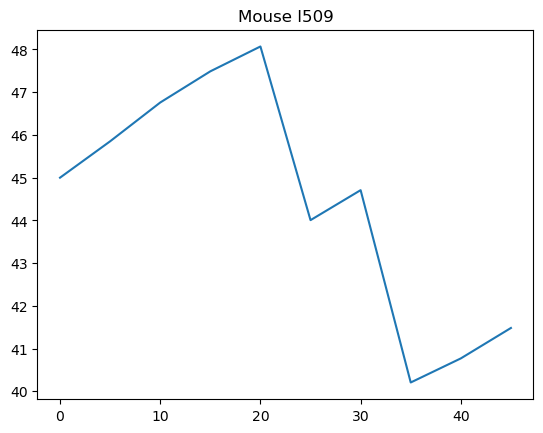

In [74]:
capomulin_mouse = mouse_data[mouse_data["Mouse ID"] == "l509"]
x_line = capomulin_mouse["Timepoint"]
y_line = capomulin_mouse["Tumor Volume (mm3)"]

plt.title("Mouse l509")
plt.plot(x_line,y_line)
plt.show()

In [87]:
capomulin_only =  mouse_data[mouse_data["Drug Regimen"] == "Capomulin"]
capomulin_only = capomulin_only.groupby(["Mouse ID"]).mean()
capomulin_only

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


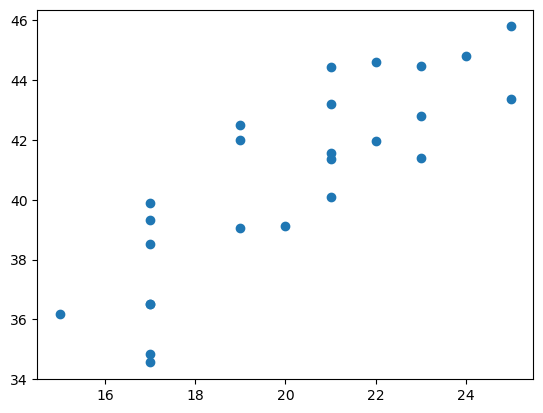

In [88]:
x_scatter = capomulin_only["Weight (g)"]
y_scatter = capomulin_only["Tumor Volume (mm3)"]
plt.scatter(x_scatter, y_scatter)

The correlation between mouse weight and the average tumor volume is 0.8419363424694721


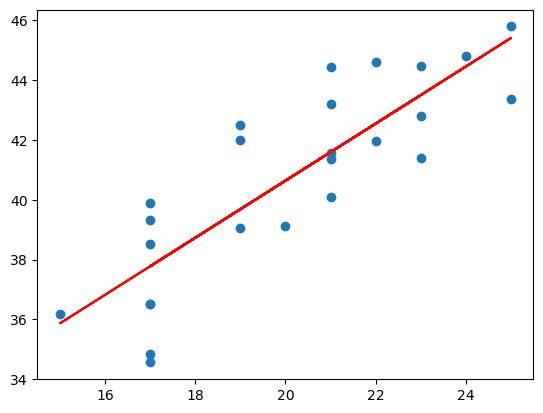

In [97]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_scatter, y_scatter) #Takes lin reg of data. r value = correl coeff.
regress_values = x_scatter * slope + intercept


plt.plot(x_scatter, regress_values, "r-", label=f"y={slope:.2f}x+{intercept:.2f}")
plt.scatter(x_scatter, y_scatter)

print(f"The correlation between mouse weight and the average tumor volume is {rvalue}")